In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np

d:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
data = pd.read_csv('train.csv')
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

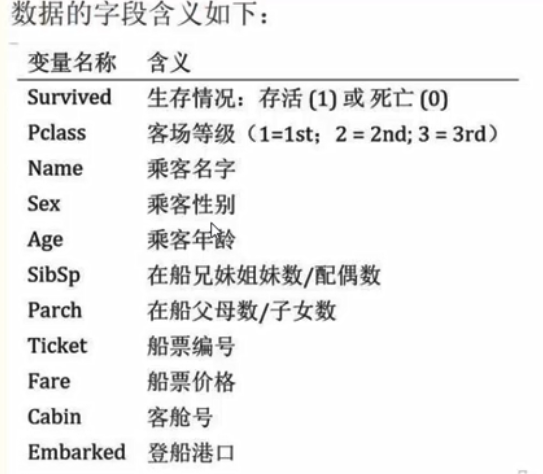

In [3]:
data = data[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked']]
data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin',
       'Embarked'],
      dtype='object')

In [4]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [5]:
data['Age'] = data['Age'].fillna(data['Age'].mean())
data['Cabin'] = pd.factorize(data['Cabin'])[0]
data.fillna(0, inplace=True)
data['Sex'] = [1 if x=='male' else 0 for x in data['Sex']]
data['p1'] = np.array(data['Pclass']==1).astype(np.int32)
data['p2'] = np.array(data['Pclass']==2).astype(np.int32)
data['p3'] = np.array(data['Pclass']==3).astype(np.int32)
del data['Pclass']
data['e1'] = np.array(data['Embarked']=='S').astype(np.int32)
data['e2'] = np.array(data['Embarked']=='C').astype(np.int32)
data['e3'] = np.array(data['Embarked']=='Q').astype(np.int32)
del data['Embarked']

In [6]:
data_train = data[[ 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'p1', 'p2', 'p3', 'e1', 'e2', 'e3']]
data_target = data['Survived'].values.reshape(len(data), 1)

In [7]:
data_train.shape, data_target.shape

((891, 12), (891, 1))

In [8]:
x = tf.placeholder("float", shape=[None, 12])
y = tf.placeholder("float", shape=[None, 1])

weight = tf.Variable(tf.random_normal([12, 1]))
bias = tf.Variable(tf.random_normal([1]))
output = tf.matmul(x, weight) + bias
pred = tf.cast(tf.sigmoid(output) > 0.5, tf.float32)

In [9]:
loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=y, logits=output))
train_step = tf.train.GradientDescentOptimizer(0.003).minimize(loss)

In [10]:
accurary = tf.reduce_mean(tf.cast(tf.equal(pred, y), tf.float32))

In [12]:
data_test = pd.read_csv('test.csv')
data_test = data_test[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked']]
data_test['Age'] = data_test['Age'].fillna(data_test['Age'].mean())
data_test['Cabin'] = pd.factorize(data_test['Cabin'])[0]
data_test.fillna(0, inplace=True)
data_test['Sex'] = [1 if x=='male' else 0 for x in data_test['Sex']]
data_test['p1'] = np.array(data_test['Pclass']==1).astype(np.int32)
data_test['p2'] = np.array(data_test['Pclass']==2).astype(np.int32)
data_test['p3'] = np.array(data_test['Pclass']==3).astype(np.int32)
del data_test['Pclass']
data_test['e1'] = np.array(data_test['Embarked']=='S').astype(np.int32)
data_test['e2'] = np.array(data_test['Embarked']=='C').astype(np.int32)
data_test['e3'] = np.array(data_test['Embarked']=='Q').astype(np.int32)
del data_test['Embarked']

In [13]:
test_table = pd.read_csv('gender_submission.csv')
test_table = tf.reshape(test_table['Survived'].values.astype(np.float32), (418,1))

In [14]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())
loss_train = []
train_acc = []
test_acc = []

In [ ]:
for i in range(25000):
    index = np.random.pre